In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('TSLA.csv')

In [3]:
data.shape 

(3307, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-06,2.090000,2.096667,1.970667,2.020667,2.020667,19116000
1,2010-12-07,2.032667,2.160000,2.003333,2.104000,2.104000,19669500
2,2010-12-08,2.165333,2.166000,2.101333,2.158000,2.158000,9900000
3,2010-12-09,2.167333,2.181333,2.110000,2.136667,2.136667,6090000
4,2010-12-10,2.136667,2.194667,2.075333,2.101333,2.101333,6441000


In [5]:
data.index 

RangeIndex(start=0, stop=3307, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

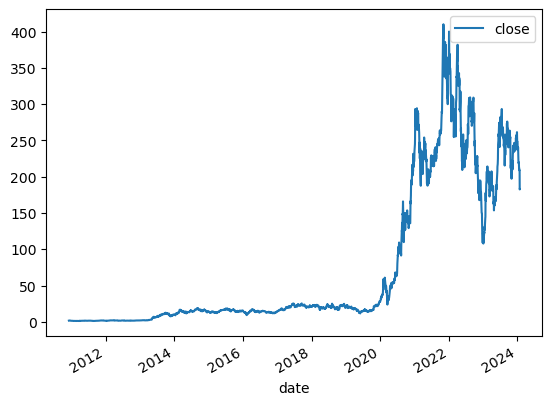

In [10]:
data.plot.line(y='close', use_index=True);

In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
2010-12-06,2.090000,2.096667,1.970667,2.020667,19116000,2.104000
2010-12-07,2.032667,2.160000,2.003333,2.104000,19669500,2.158000
2010-12-08,2.165333,2.166000,2.101333,2.158000,9900000,2.136667
2010-12-09,2.167333,2.181333,2.110000,2.136667,6090000,2.101333
2010-12-10,2.136667,2.194667,2.075333,2.101333,6441000,2.036667


In [13]:
#create target
data['Target']= (data['Tomorrow']>data['close']).astype(int)

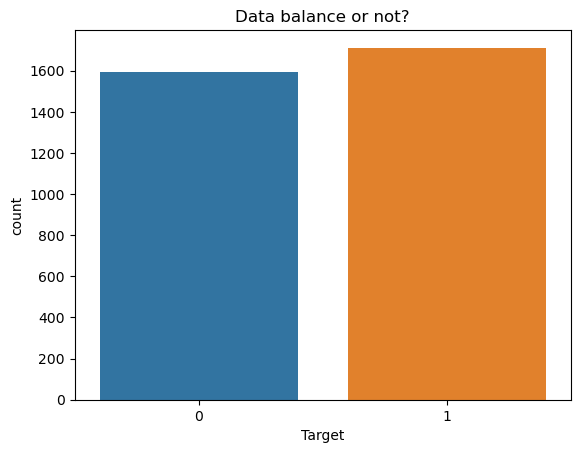

In [14]:
sns.countplot(data=data, x='Target');
plt.title('Data balance or not?');

In [15]:
data.head()

,open,high,low,close,volume,Tomorrow,Target
date,,,,,,,
2010-12-06,2.090000,2.096667,1.970667,2.020667,19116000,2.104000,1
2010-12-07,2.032667,2.160000,2.003333,2.104000,19669500,2.158000,1
2010-12-08,2.165333,2.166000,2.101333,2.158000,9900000,2.136667,0
2010-12-09,2.167333,2.181333,2.110000,2.136667,6090000,2.101333,0
2010-12-10,2.136667,2.194667,2.075333,2.101333,6441000,2.036667,0


In [16]:
train = data.iloc[:-200]
test = data.iloc[-200:]

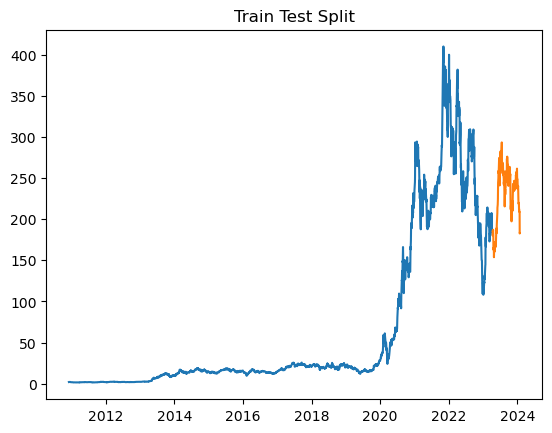

In [17]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [18]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print()

In [19]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [20]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 2.60
MAPE: 0.01

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 3.09
MAPE: 0.01

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 2.96
MAPE: 0.01

Learning rate set to 0.318397
0:	learn: 67.4888570	total: 164ms	remaining: 16.3s
1:	learn: 47.3956144	total: 173ms	remaining: 8.46s
2:	learn: 33.2028933	total: 175ms	remaining: 5.67s
3:	learn: 23.6814935	total: 178ms	remaining: 4.28s
4:	learn: 17.0405293	total: 181ms	remaining: 3.44s
5:	learn: 12.5992864	total: 184ms	remaining: 2.88s
6:	learn: 9.5599332	total: 187ms	remaining: 2.48s
7:	learn: 7.6417048	total: 189ms	remaining: 2.18s
8:	learn: 6.3882198	total: 192ms	remaining: 1.94s
9:	learn: 5.6498924	total: 195ms	remaining: 1.75s
10:	learn: 5.1682062	total: 197ms	remaining: 1.59s
11:	learn: 4.9095690	total: 199ms	remaining: 1.46s
12:	learn: 4.6652177	total: 201ms	remaining:

#### Retrain the best Model(Extreme Gradient Boosting)

In [21]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [22]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [23]:
#combined_1.plot();
combined_2

,close,0
date,,
2023-04-12,180.539993,190.979242
2023-04-13,185.899994,184.314907
2023-04-14,185.000000,184.314907
2023-04-17,187.039993,184.314907
2023-04-18,184.309998,184.314907
...,...,...
2024-01-22,208.800003,213.771787
2024-01-23,209.139999,214.343808
2024-01-24,207.830002,214.343808


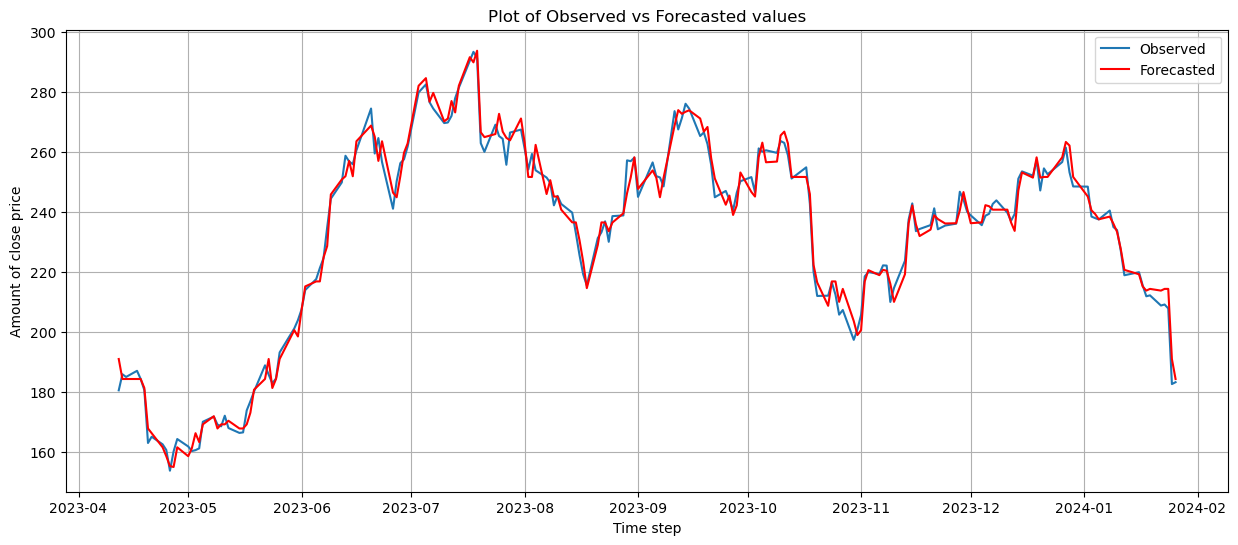

In [24]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [25]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [26]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [27]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [28]:
data['RSI']= computeRSI(data['close'], 14)

In [29]:
data.head()

,open,high,low,close,volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2010-12-06,2.090000,2.096667,1.970667,2.020667,19116000,2.104000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-07,2.032667,2.160000,2.003333,2.104000,19669500,2.158000,1,1.020204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-08,2.165333,2.166000,2.101333,2.158000,9900000,2.136667,0,1.012670,4.124667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,2.167333,2.181333,2.110000,2.136667,6090000,2.101333,0,0.995033,4.262000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,2.136667,2.194667,2.075333,2.101333,6441000,2.036667,0,0.991663,4.294667,0.998669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.shape 

(3307, 19)

In [31]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2010-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020667,NaN
2010-12-07,1.020204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.104000,NaN
2010-12-08,1.012670,4.124667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.158000,NaN
2010-12-09,0.995033,4.262000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.136667,NaN
2010-12-10,0.991663,4.294667,0.998669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.101333,NaN


In [32]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [33]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [34]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [35]:
new_data=new_data.dropna()
new_data.shape 

(2307, 16)

In [36]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2014-11-25,1.002769,32.633333,1.005194,82.910001,0.993890,1000.862670,1.145516,3601.503997,2.685848,6143.436657,16.539333,0.032848,16.390889,16.438333,6.153822,16.373393
2014-11-26,1.000705,32.987333,1.006042,82.269334,0.997473,998.460669,1.144571,3609.580663,2.683337,6157.955323,16.562668,0.026909,16.516667,16.433833,6.164210,16.382626
2014-11-28,0.992048,33.102001,0.993539,82.316001,0.984470,996.277337,1.124019,3617.657998,2.634960,6172.413991,16.301332,-0.026127,16.467778,16.462833,6.174317,16.378661
2014-12-01,0.972950,32.864000,0.949804,82.036666,0.935485,993.509337,1.063112,3625.681330,2.490808,6186.557323,15.442667,-0.070092,16.102222,16.211500,6.183548,16.333002
2014-12-02,0.999547,31.743999,0.960992,81.294000,0.937836,990.459338,1.060348,3631.477330,2.483212,6199.863323,15.428667,-0.080532,15.724222,15.933833,6.192748,16.288888


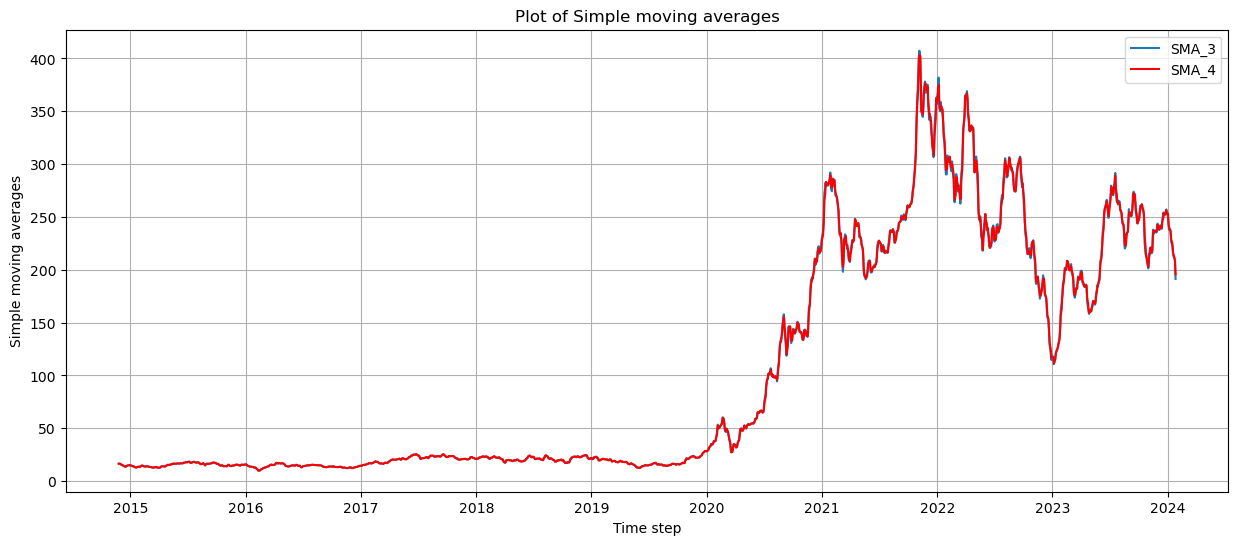

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

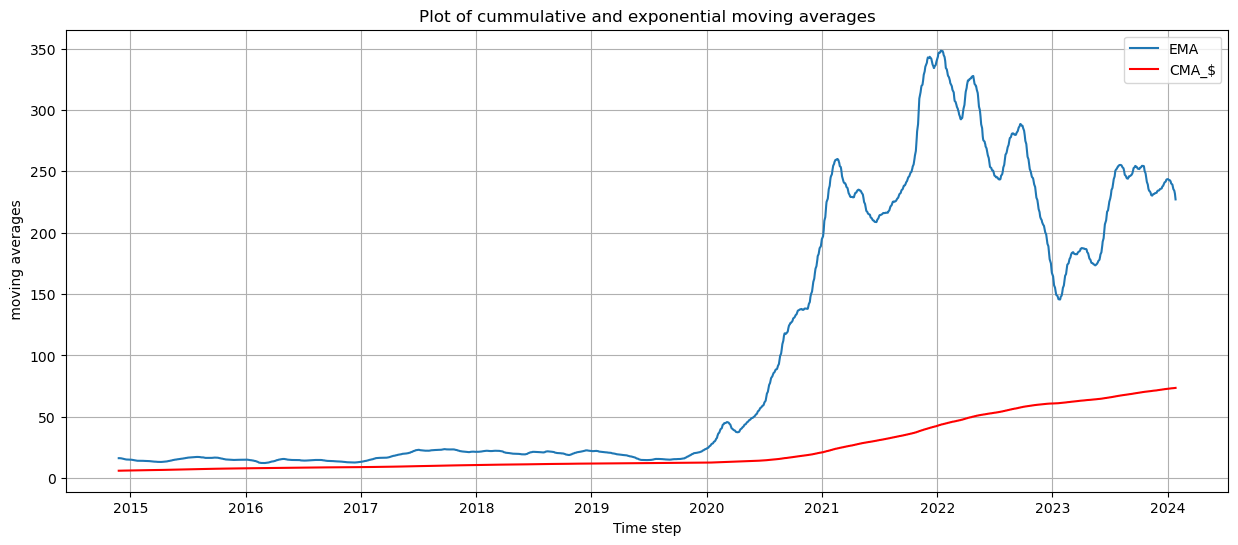

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

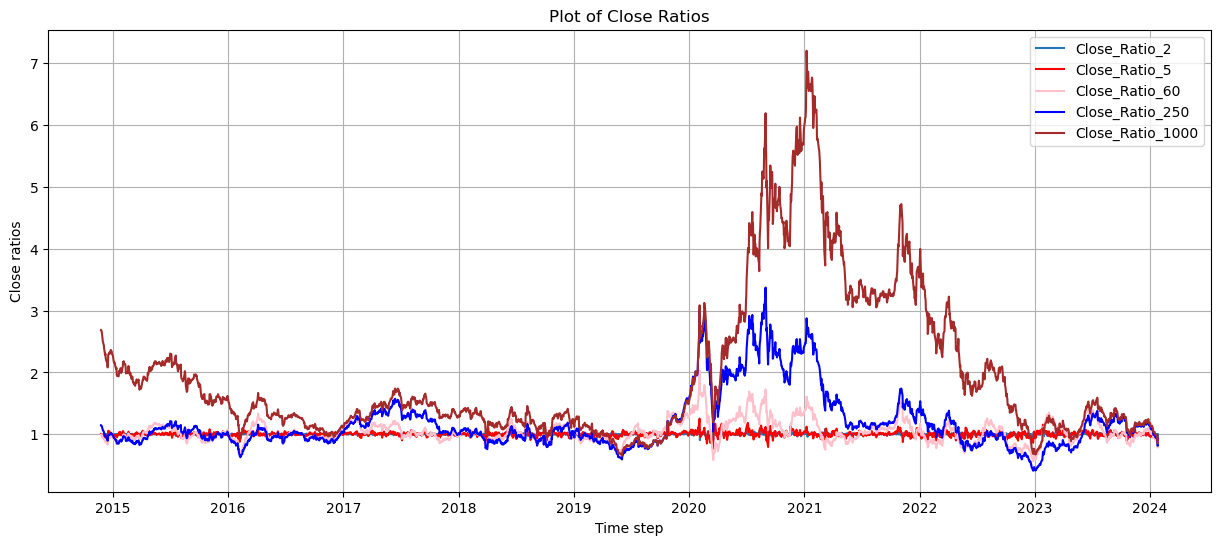

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

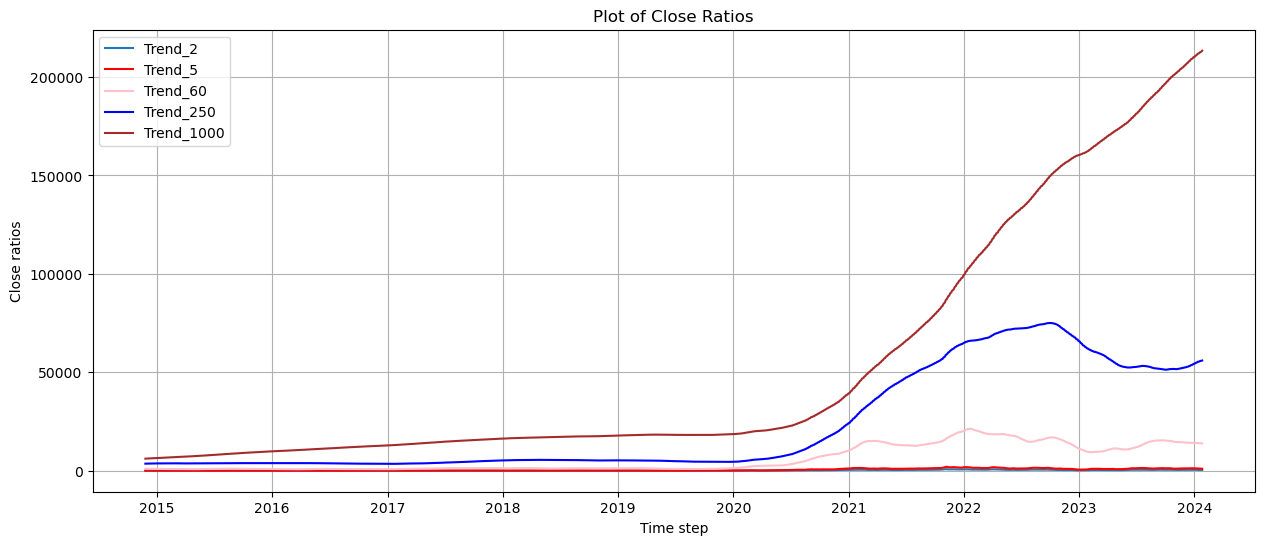

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [41]:
new_data['RSI']=data['RSI']

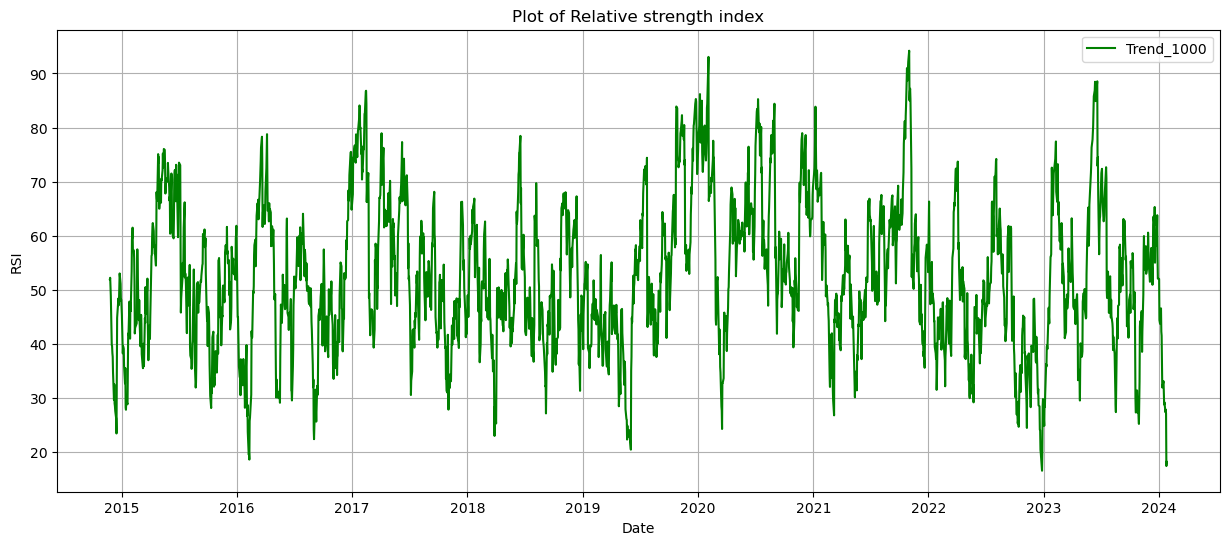

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

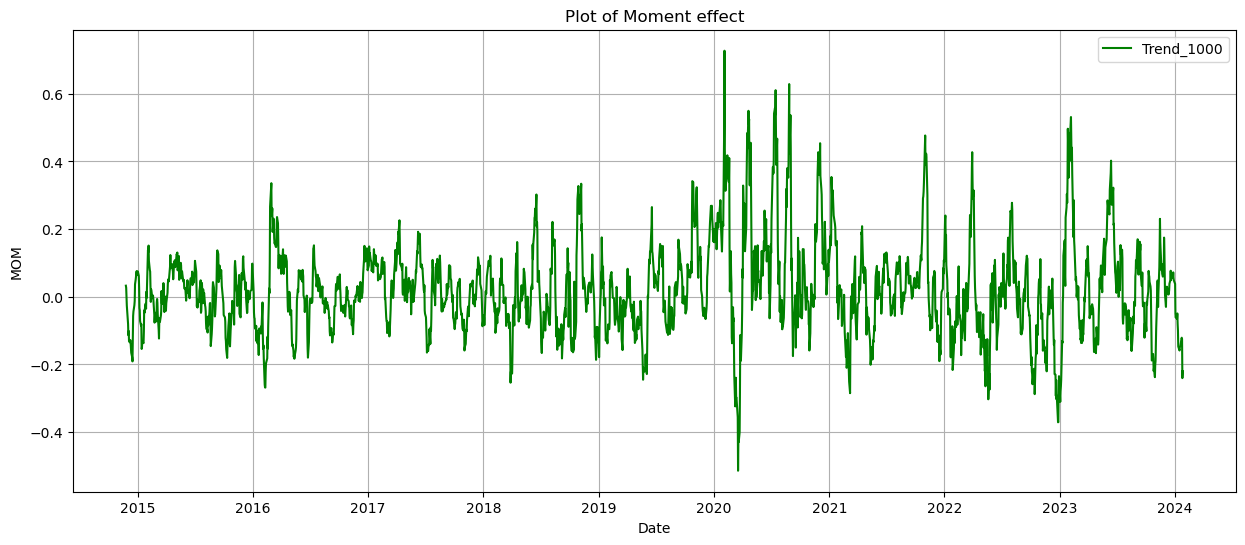

In [43]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [44]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [45]:
train.shape

(2107, 17)

In [46]:
x=2107/len(new_data)

In [47]:
x 

0.9133073255309926

In [48]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI'],
      dtype='object')

In [49]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM'] 

#### Retrain the models on the new predictors

In [50]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 3.99
MAPE: 0.02

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 4.88
MAPE: 0.02

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 4.03
MAPE: 0.02

Learning rate set to 0.299446
0:	learn: 78.0025815	total: 2.86ms	remaining: 283ms
1:	learn: 56.7331192	total: 5.41ms	remaining: 265ms
2:	learn: 41.3130878	total: 7.73ms	remaining: 250ms
3:	learn: 30.3139683	total: 10.1ms	remaining: 243ms
4:	learn: 22.6274291	total: 12.4ms	remaining: 235ms
5:	learn: 17.1854521	total: 14.7ms	remaining: 230ms
6:	learn: 13.3099321	total: 16.9ms	remaining: 225ms
7:	learn: 10.8144529	total: 19.2ms	remaining: 220ms
8:	learn: 9.2837317	total: 21.6ms	remaining: 219ms
9:	learn: 8.1790309	total: 23.9ms	remaining: 215ms
10:	learn: 7.5479815	total: 26.3ms	remaining: 213ms
11:	learn: 6.8254817	total: 28.6ms	remaining: 210ms
12:	learn: 6.4372383	total: 30.8ms	remaining: 206ms
13:	learn: 5.9645042

#### Improving the model

In [51]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [52]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [53]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [54]:
predictions_2 = backtest(new_data, model_2, predictors)

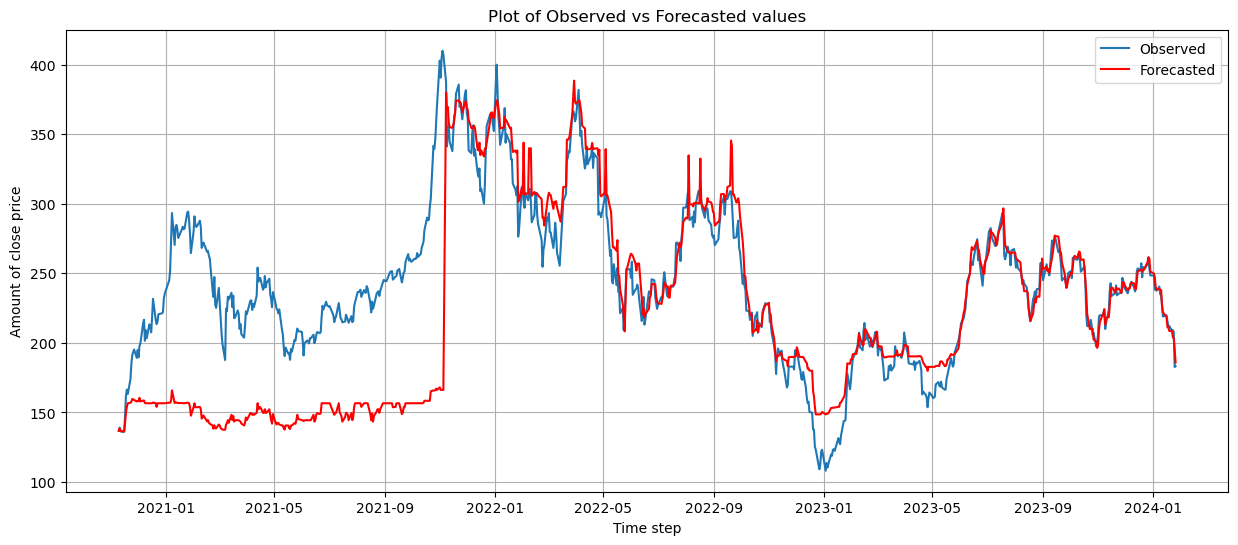

In [55]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [56]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [57]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [58]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.02512412355938484

mean absolute  error is : 5.692673292331854



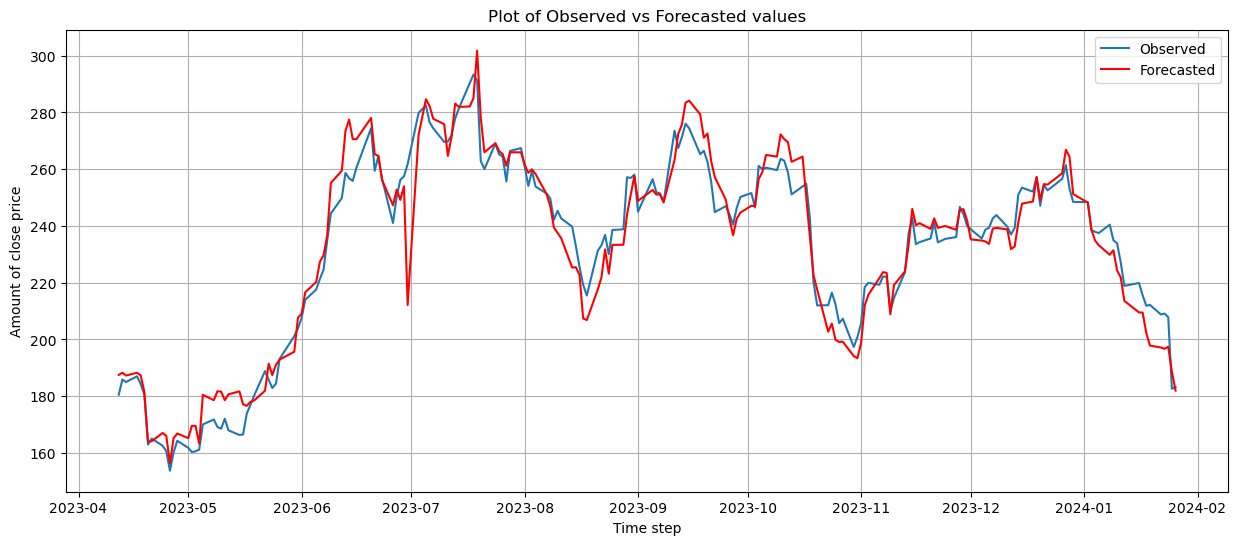

In [59]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

In [60]:
#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

0.9134164997149744
GradientBoostingRegressor(min_samples_split=6, n_estimators=300)


In [61]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [62]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2023-04-12,180.539993,184.042303
2023-04-13,185.899994,185.132863
2023-04-14,185.000000,184.175745
2023-04-17,187.039993,188.110709
2023-04-18,184.309998,184.178880
...,...,...
2024-01-22,208.800003,204.951233
2024-01-23,209.139999,200.327129
2024-01-24,207.830002,200.532520


In [63]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [64]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.017145756548653784

mean absolute  error is : 3.941188204425454



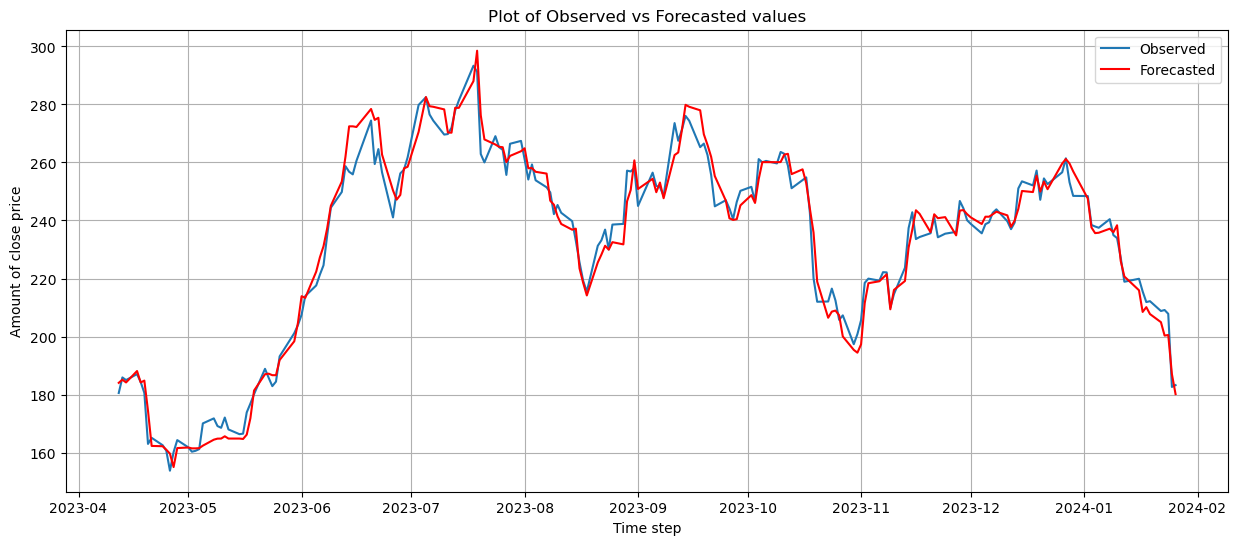

In [65]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [68]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
Mae: {bagging_mae} \n \
Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking mape: {stacking_mape} \n")


#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 Mae: 4.0579018935 
 Mape: 0.01749787406039444 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 3.350866455097073 
 stacking mape: 0.014590050830441608 



In [69]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [70]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [71]:
combined_bagg.head()

,close,0
date,,
2023-04-12,180.539993,184.362998
2023-04-13,185.899994,186.088995
2023-04-14,185.000000,183.432997
2023-04-17,187.039993,189.363330
2023-04-18,184.309998,185.773998


In [72]:
combined_stack.head()

,close,0
date,,
2023-04-12,180.539993,184.848085
2023-04-13,185.899994,185.817864
2023-04-14,185.000000,184.668044
2023-04-17,187.039993,188.474841
2023-04-18,184.309998,186.596507


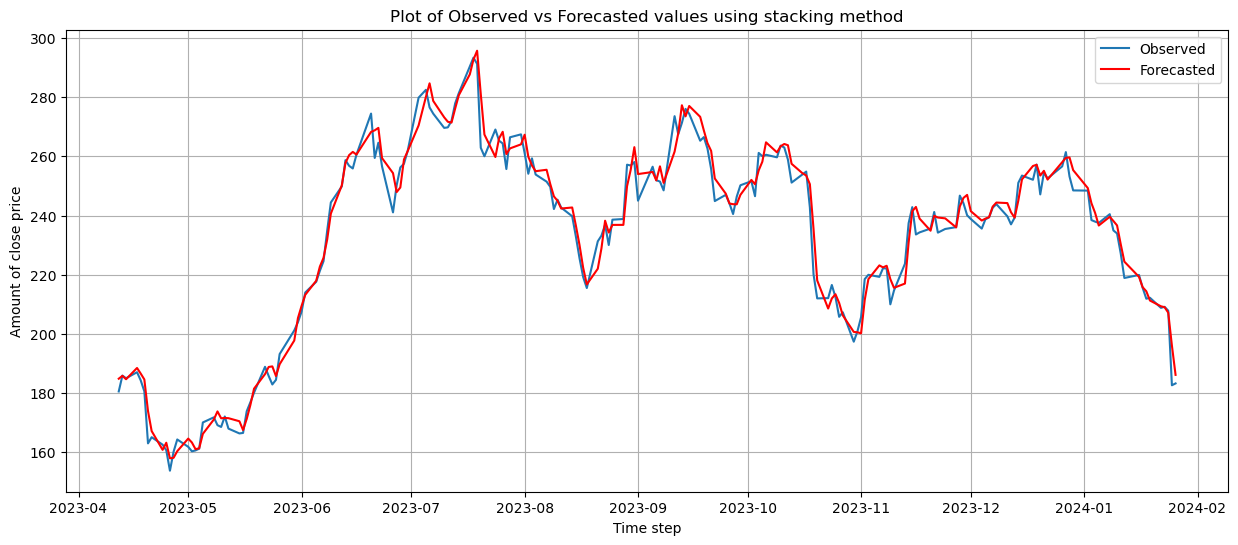

In [73]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

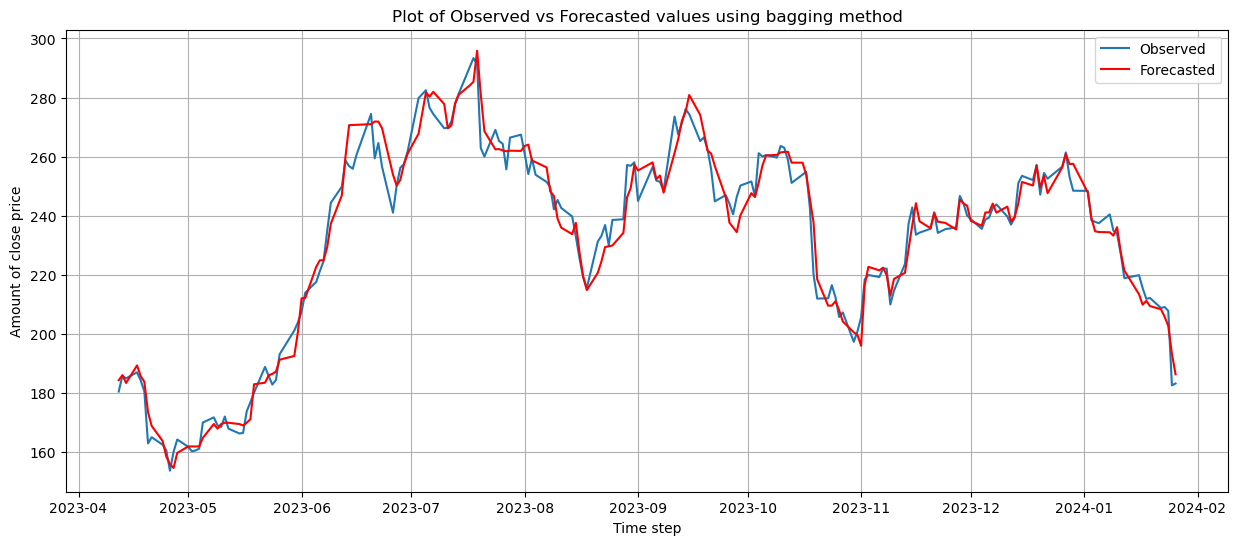

In [74]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

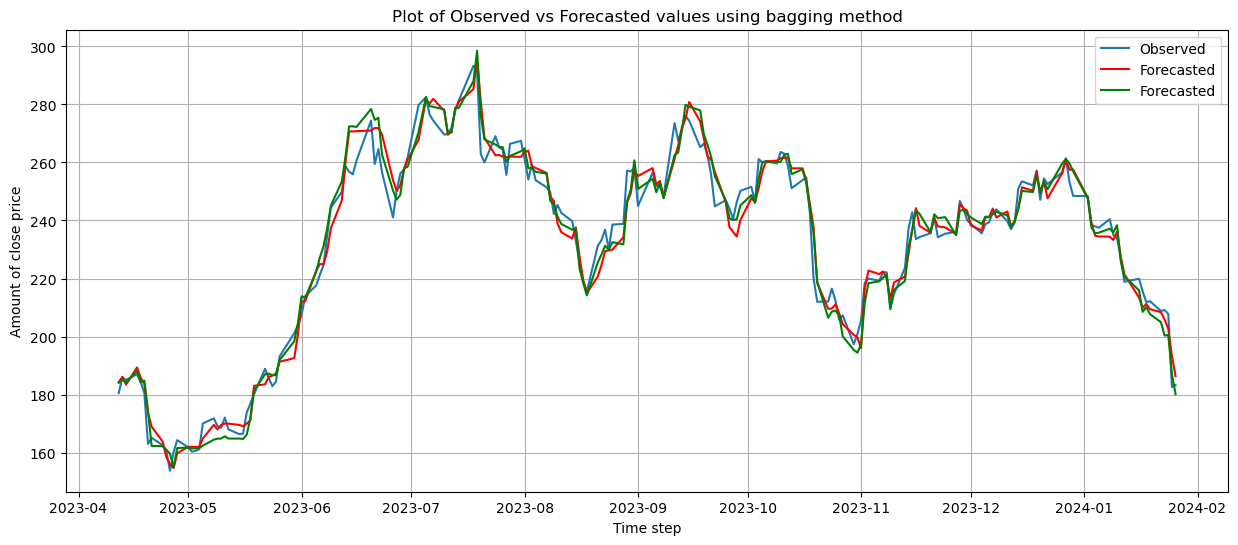

In [75]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.plot(combined[0], color='green', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()